In [64]:
import pandas as pd
import numpy as np
import os
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

****Importing and Inspecting Data set****

In [2]:
data= pd.read_excel("loan data.xlsx")

In [3]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

***Checking Null Values***

In [6]:
data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

*Missing values found in Employement type column only. As it is catagorial data, fill the missing values with Mode value using pandas.*

In [8]:
data['Employment.Type'].fillna(data['Employment.Type'].mode()[0], inplace=True)

*verify after fill NA.*

In [9]:
data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [10]:
data.shape

(233154, 41)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      233154 non-null  object        
 

In [12]:
data.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

### Performing EDA

In [13]:
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


**Checking the overall distribution of variables**

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan_default', ylabel='count'>

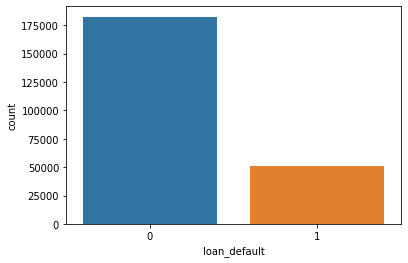

In [20]:
sns.countplot(data["loan_default"])

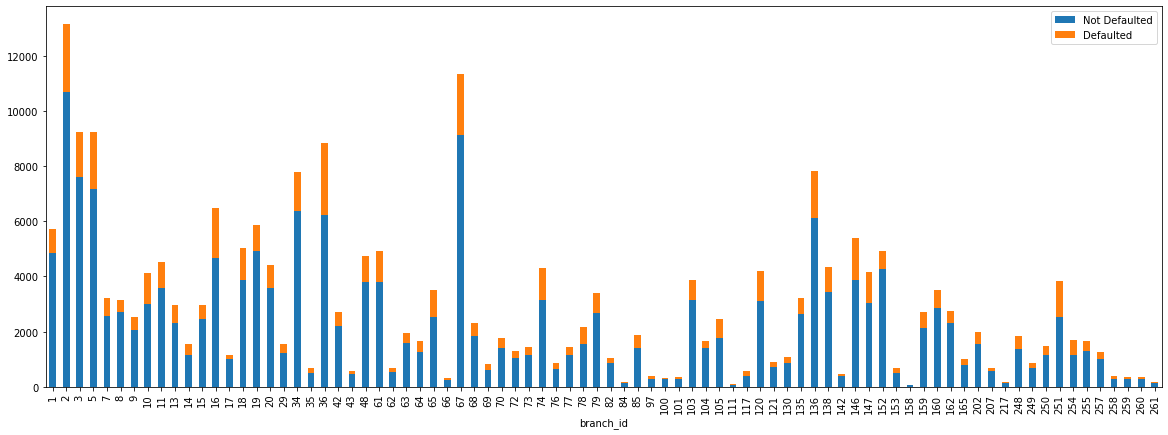

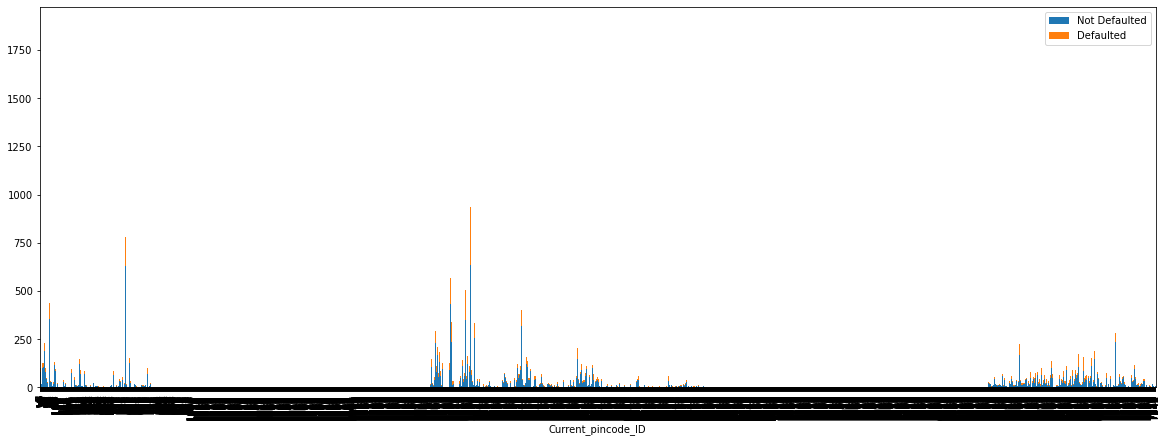

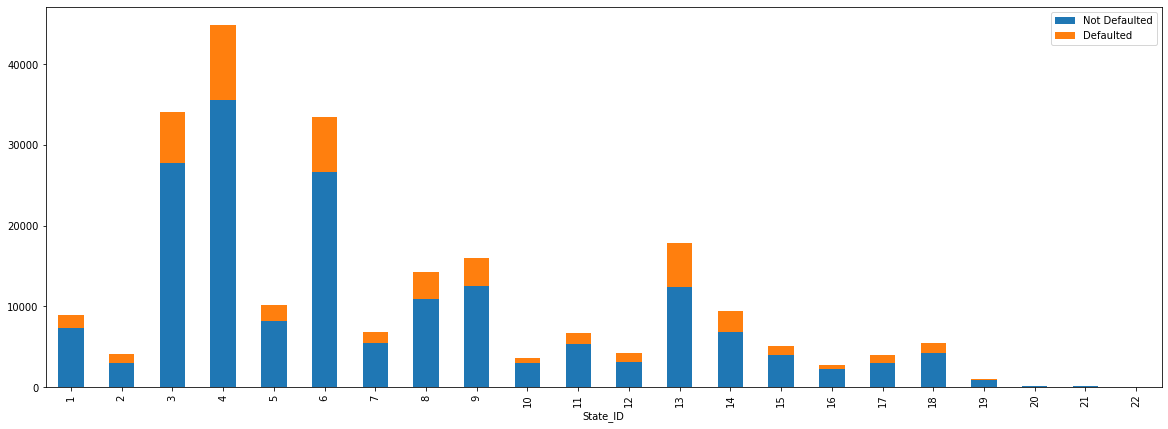

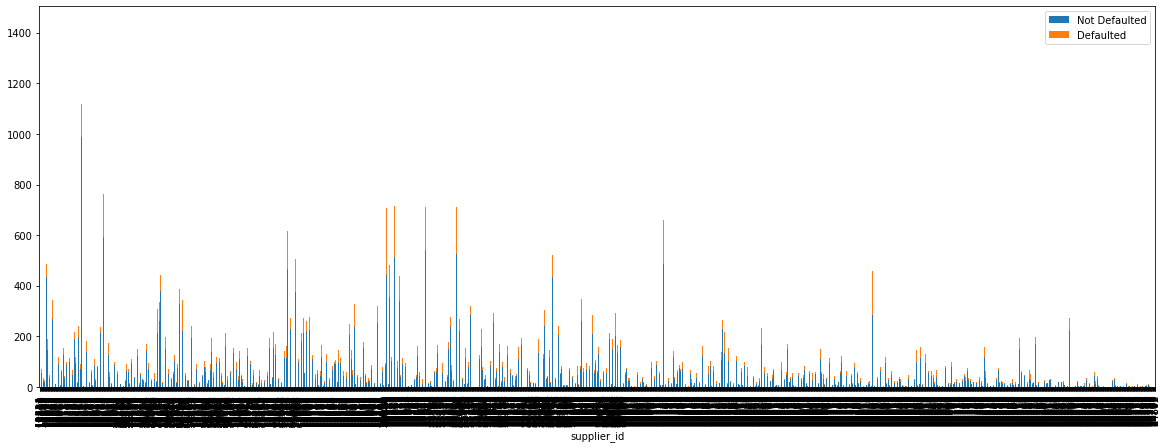

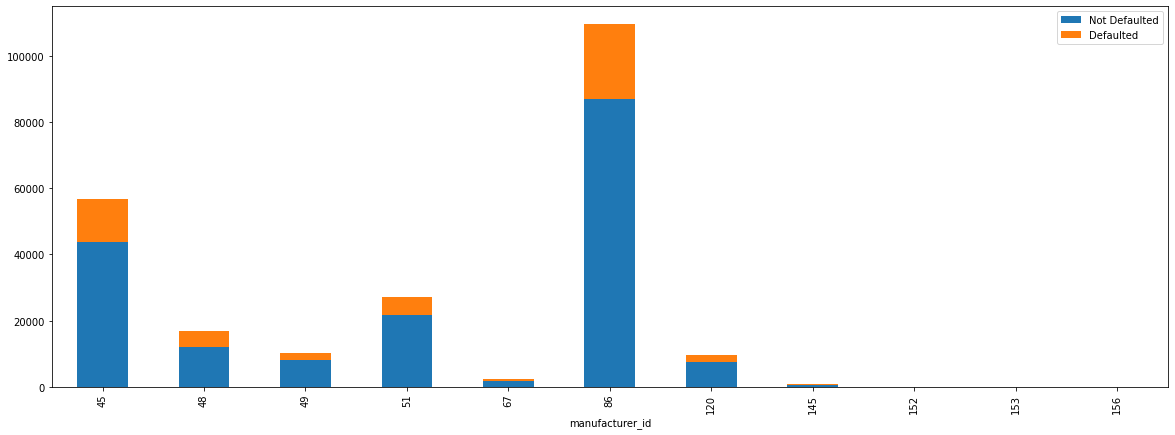

In [15]:
for i in ['branch_id','Current_pincode_ID','State_ID','supplier_id','manufacturer_id']:
    ct = pd.crosstab(data[i],data['loan_default'])
    ct.plot.bar(stacked = True,figsize=(20,7))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()

**Finding the different types of employment given in the data**

In [19]:
data['Employment.Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

**Pie Chart**

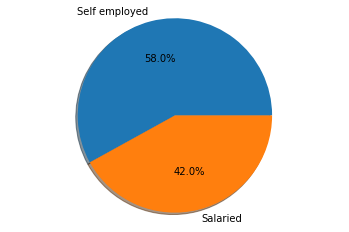

In [21]:
labels = ['Self employed', 'Salaried']
sizes = data['Employment.Type'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [23]:
pct_loan_default = data['loan_default'].value_counts(normalize=True)*100
pct_loan_default

0    78.292888
1    21.707112
Name: loan_default, dtype: float64

In [28]:
print('% of salaried customer only who have defaulted:',
     np.round(data[(data['Employment.Type']=='Salaried') 
                       & (data['loan_default']==1)].shape[0]/(data[data['Employment.Type']=='Salaried'].shape[0])*100,2))


% of salaried customer only who have defaulted: 20.35


In [30]:
print('% of self employed customer only who have defaulted:',
     np.round(data[(data['Employment.Type']=='Self employed') 
                       & (data['loan_default']==1)].shape[0]/(data[data['Employment.Type']=='Self employed'].shape[0])*100,2))

% of self employed customer only who have defaulted: 22.69


**Bar Chart to draw the employment vs loan default**

Text(0.5, 1.0, 'Employment Bar Graph')

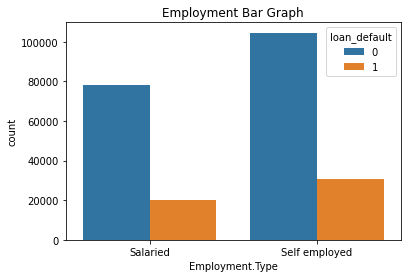

In [32]:
sns.countplot(x='Employment.Type',hue='loan_default',data=data)
plt.title('Employment Bar Graph')

In [34]:
loan=pd.crosstab(data['Employment.Type'],data['loan_default'])
loan

loan_default,0,1
Employment.Type,,
Salaried,77948,19910
Self employed,104595,30701


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

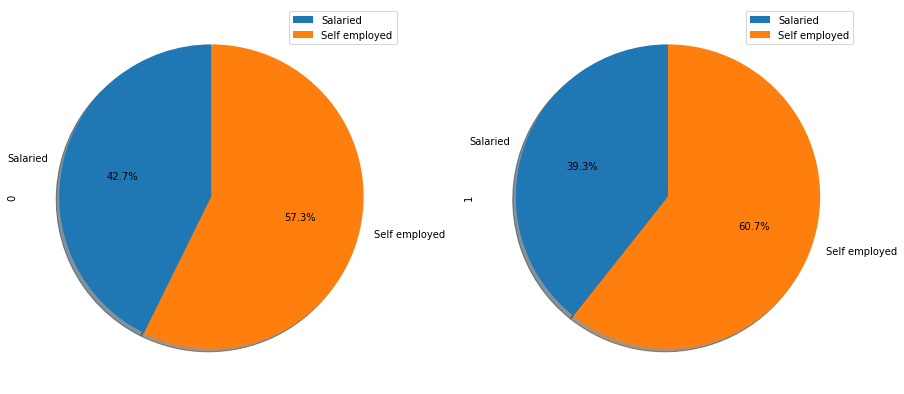

In [35]:
loan.groupby(['Employment.Type']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

**Distribution of age w.r.t. to defaulters and non-defaulters**

In [37]:
data['age'] = pd.DatetimeIndex(data['DisbursalDate']).year - pd.DatetimeIndex(data['Date.of.Birth']).year

Text(0.5, 1.0, 'Age Histogram')

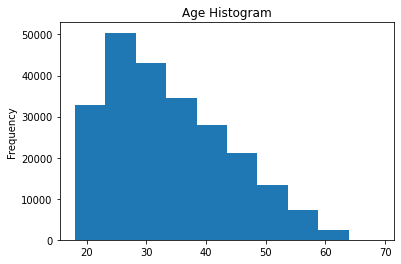

In [41]:
data['age'].plot.hist()
plt.title('Age Histogram')

In [42]:
data.age.describe()

count    233154.000000
mean         34.100946
std           9.805992
min          18.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

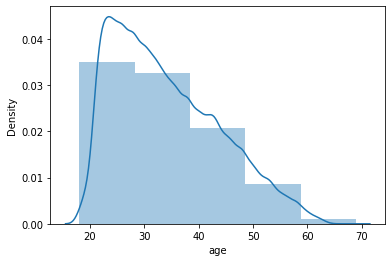

In [43]:
sns.distplot(data["age"],bins=5)

Text(0.5, 1.0, 'Age BoxPlot')

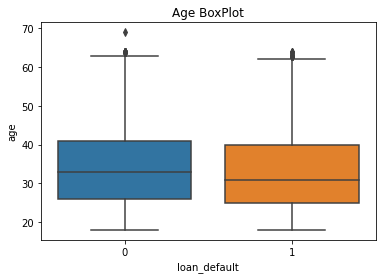

In [44]:
sns.boxplot(x='loan_default', y='age',data=data)
plt.title('Age BoxPlot')

**Finding the type of ID was presented by most of the customers for proof**

In [45]:
data["MobileNo_Avl_Flag"].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [46]:
data["Aadhar_flag"].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

In [47]:
data["PAN_flag"].value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

In [48]:
data["VoterID_flag"].value_counts()

0    199360
1     33794
Name: VoterID_flag, dtype: int64

In [49]:
data["Passport_flag"].value_counts()

0    232658
1       496
Name: Passport_flag, dtype: int64

**----->most of the users given Aadhar as their ID**

***Credit bureau score distribution***

In [53]:
data["PERFORM_CNS.SCORE"].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64

*Distribution for defaulters vs non-defaulters*

In [55]:
non_default = data[data['loan_default']==0]['PERFORM_CNS.SCORE']
default = data[data['loan_default']==1]['PERFORM_CNS.SCORE']

In [56]:
pd.DataFrame([non_default.describe(), default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,299.784270,342.883794,0.0,0.0,15.0,690.0,890.0
defaulters,50611.0,252.236372,318.826242,0.0,0.0,0.0,610.0,879.0


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


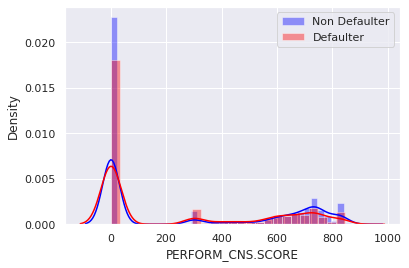

In [66]:
sns.distplot( a = non_default, color='blue', label = 'Non Defaulter')
sns.distplot(a = default, color='red', label = 'Defaulter')
plt.legend()
plt.show()

****Finding whether there is difference between the sanctioned and disbursed amount of primary and secondary loans(T-test)****

**For Primary accounts**

In [70]:
_,p_value=stats.ttest_rel(a=data["PRI.SANCTIONED.AMOUNT"],b=data["PRI.DISBURSED.AMOUNT"])

In [71]:
print(p_value)

0.07550682707997997


In [72]:
if p_value<0.05:
    print("Rejected,There is significant difference between primary loan sanctioned and disbursed")
else:
    print("Accepted,There is no significant difference between primary loan sanctioned and disbursed")

Accepted,There is no significant difference between primary loan sanctioned and disbursed


In [73]:
data["pri_diff_sanc_dis"]=data["PRI.SANCTIONED.AMOUNT"]-data["PRI.DISBURSED.AMOUNT"]

In [74]:
data["pri_diff_sanc_dis"].sum()

102111349

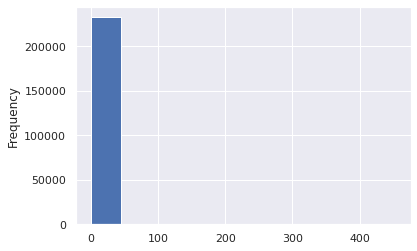

<Figure size 360x144 with 0 Axes>

In [88]:
data['PRI.NO.OF.ACCTS'].plot(kind='hist')
plt.figure(figsize=(5,2))
plt.show()

In [81]:
pri_non_default = data[data['loan_default']==0]['PRI.NO.OF.ACCTS']
pri_default = data[data['loan_default']==1]['PRI.NO.OF.ACCTS']

In [82]:
pd.DataFrame([pri_non_default.describe(), pri_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,2.538038,5.261142,0.0,0.0,1.0,3.0,354.0
defaulters,50611.0,2.089328,5.040134,0.0,0.0,0.0,2.0,453.0


*Checking the correlation between primary and loan deafult vairable*

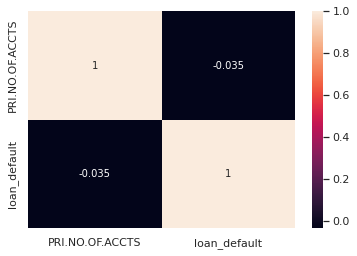

In [87]:
sns.heatmap(data[['PRI.NO.OF.ACCTS','loan_default']].corr(),annot=True)
plt.show()

*difference between the sanctioned and disbursed amount of primary loans*

In [89]:
pri_acct_loan_amt =['PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


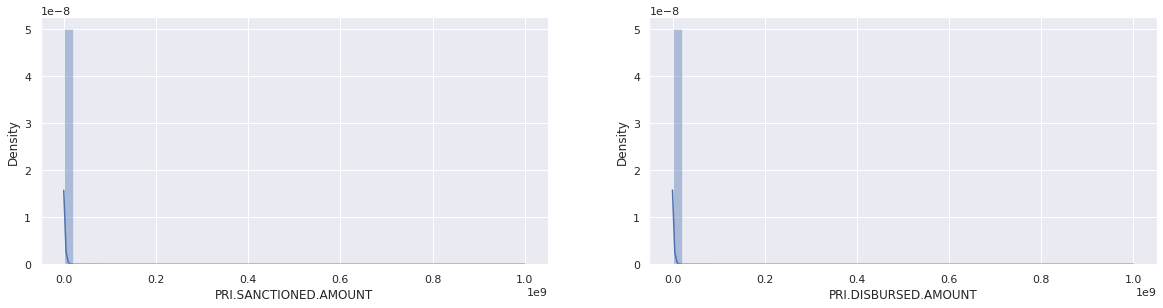

In [90]:
count = 1
plt.figure(figsize=(20,10))
for i in pri_acct_loan_amt:
    plt.subplot(2,2,count)
    sns.distplot(data[i])
    count += 1
plt.show()

**For Secondary accounts**

In [75]:
_,p_value=stats.ttest_rel(a=data["SEC.SANCTIONED.AMOUNT"],b=data["SEC.DISBURSED.AMOUNT"])

In [76]:
print(p_value)

2.8873358771164625e-30


In [77]:
if p_value<0.05:
    print("Rejected,There is significant difference between secondary loan sanctioned and disbursed")
else:
    print("Accepted,There is no significant difference between secondary loan sanctioned and disbursed")

Rejected,There is significant difference between secondary loan sanctioned and disbursed


In [78]:
data["sec_diff_sanc_dis"]=data["SEC.SANCTIONED.AMOUNT"]-data["SEC.DISBURSED.AMOUNT"]

In [79]:
data["sec_diff_sanc_dis"].sum()

27028488

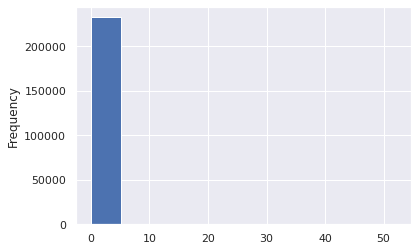

In [85]:
data['SEC.NO.OF.ACCTS'].plot(kind='hist')
plt.show()

*Checking the correlation between seceondary and loan deafult vairable*

In [83]:
sec_non_default = data[data['loan_default']==0]['SEC.NO.OF.ACCTS']
sec_default = data[data['loan_default']==1]['SEC.NO.OF.ACCTS']

In [84]:
pd.DataFrame([sec_non_default.describe(), sec_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,0.061848,0.651657,0.0,0.0,0.0,0.0,52.0
defaulters,50611.0,0.049100,0.527358,0.0,0.0,0.0,0.0,38.0


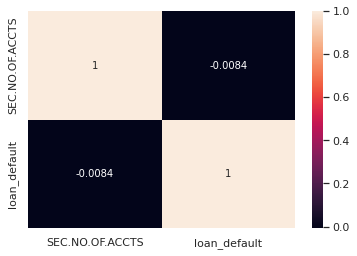

In [86]:
sns.heatmap(data[['SEC.NO.OF.ACCTS','loan_default']].corr(),annot=True)
plt.show()

*difference between the sanctioned and disbursed amount of secondary loans*

In [91]:
sec_acct_loan_amt =['SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


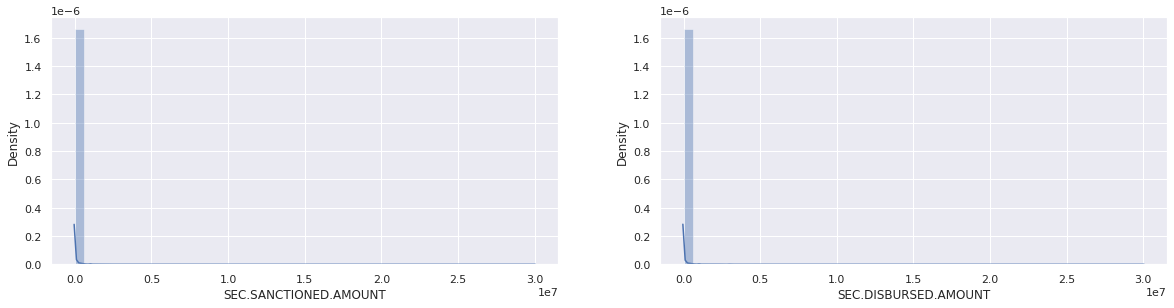

In [92]:
count=1
plt.figure(figsize=(20,10))
for i in sec_acct_loan_amt:
    plt.subplot(2,2,count)
    sns.distplot(data[i])
    count+=1
plt.show()

**customer who make higher no. of enquiries end up being higher risk candidates**

In [94]:
enquiries_counts = data['NO.OF_INQUIRIES'].value_counts()
enquiries_counts_percent = data['NO.OF_INQUIRIES'].value_counts(normalize=True)*100

pd.DataFrame({'counts':enquiries_counts,'(%) Percent_Of_Data':enquiries_counts_percent})

,counts,(%) Percent_Of_Data
0,201961,86.621289
1,22285,9.558060
2,5409,2.319926
3,1767,0.757868
4,760,0.325965
5,343,0.147113
6,239,0.102507
7,135,0.057902
8,105,0.045035
9,44,0.018872


In [95]:
no_of_loan_inquiries = pd.crosstab(index=data['NO.OF_INQUIRIES'], columns=data['loan_default'])
no_of_loan_inquiries['pct_default'] = (no_of_loan_inquiries[1]/no_of_loan_inquiries.sum(axis=1))*100
no_of_loan_inquiries

loan_default,0,1,pct_default
NO.OF_INQUIRIES,,,
0,159404,42557,21.071890
1,16844,5441,24.415526
2,3918,1491,27.565169
3,1250,517,29.258630
4,526,234,30.789474
5,212,131,38.192420
6,148,91,38.075314
7,80,55,40.740741
8,61,44,41.904762


*credit history, i.e. new loans in last six months, loans defaulted in last six months, time since first loan, etc., a significant factor in estimating probability*

In [96]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [97]:
data['CREDIT.HISTORY.LENGTH'] =data['CREDIT.HISTORY.LENGTH'].apply(duration)

In [98]:
data['CREDIT.HISTORY.LENGTH'].describe()

count    233154.000000
mean         16.252404
std          28.581255
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: CREDIT.HISTORY.LENGTH, dtype: float64

In [99]:
credit_non_default = data[data['loan_default'] == 0]['CREDIT.HISTORY.LENGTH']
credit_default = data[data['loan_default'] == 1]['CREDIT.HISTORY.LENGTH']

In [100]:
pd.DataFrame([credit_non_default.describe(), credit_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,16.886377,29.342245,0.0,0.0,0.0,24.0,449.0
defaulters,50611.0,13.965798,25.519395,0.0,0.0,0.0,21.0,468.0


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


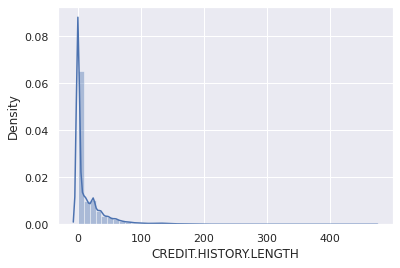

In [101]:
sns.distplot(data['CREDIT.HISTORY.LENGTH'])
plt.show()

In [102]:
new_acct_counts = data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()
new_acct_counts_percent =data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize=True)*100

pd.DataFrame({'counts':new_acct_counts,'(%) Percent_Of_Data':new_acct_counts_percent})

,counts,(%) Percent_Of_Data
0,181494,77.842971
1,32099,13.767295
2,11015,4.724345
3,4458,1.912041
4,1957,0.839359
5,964,0.413461
6,480,0.205873
7,302,0.129528
8,147,0.063048
9,79,0.033883


In [103]:
delinquent_acct_counts = data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()
delinquent_acct_counts_percent = data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize=True)*100

pd.DataFrame({'counts':delinquent_acct_counts,'delinquent_acct_counts':delinquent_acct_counts_percent})

,counts,delinquent_acct_counts
0,214959,92.196145
1,14941,6.408211
2,2470,1.059386
3,537,0.230320
4,138,0.059188
5,58,0.024876
6,20,0.008578
7,13,0.005576
8,7,0.003002
12,3,0.001287


<AxesSubplot:>

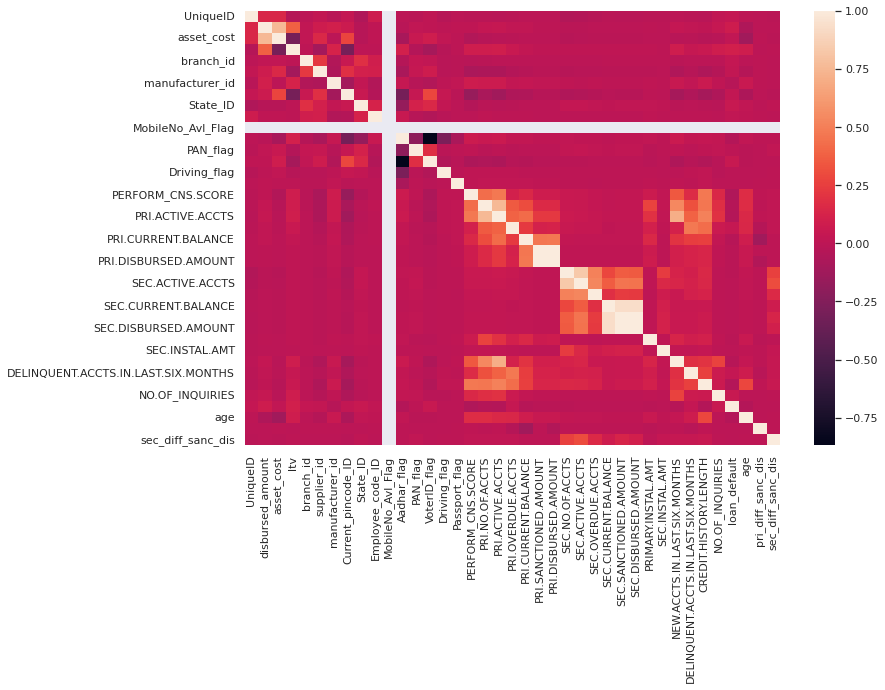

In [106]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

   *From the correlation heatmap, Primary and secondary accounts,credit history, that is new loans in last six months, loans defaulted in last six months, time since first loan, are not a significant factor in estimating probability of loan defaulters*

### Model Building And Performing Prediction

In [107]:
X=data.iloc[:,[0,1,2,4,5,6,7,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39]]
y=data.iloc[:,40]

In [108]:
X.head()

,UniqueID,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,420825,50578,58400,67,22807,45,1441,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
1,417566,53278,61360,67,22807,45,1497,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
2,539055,52378,60300,67,22807,45,1495,1998,1,1,...,0,0,0,0,0,0,0,0,0,1
3,529269,46349,61500,67,22807,45,1502,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
4,563215,43594,78256,67,22744,86,1499,1998,1,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X.shape

(233154, 32)

In [111]:
y.shape

(233154,)

***train test split***

In [121]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [113]:
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (163207, 32)
X_test size:  (69947, 32)


In [114]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Precision: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))
    print("f1 score: ",metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

***Scaling data before model training and testing***

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Performing Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

In [119]:
params = {'C':[0.1, 0.5, 1, 5]}

lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
evaluate_model(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix: 
 [[54926   126]
 [14831    64]]
Accuracy:  0.7861666690494231
Precision:  0.3368421052631579
Recall:  0.004296743873783149
f1 score:  0.008485250248591316
roc_auc_score:  0.5010039993437069


In [120]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('F1 score: ',f1_score(y_test,y_pred))

Accuracy score:  0.7861666690494231
Precision score:  0.3368421052631579
Precision score:  0.3368421052631579
Recall score:  0.004296743873783149
F1 score:  0.008485250248591316


***--->So, the accuracy for the logistic regression model is- 78%***

#### Exporting trained data set for visualisation in Tableau

In [122]:
data.to_excel('D:\PGDA\Projects\loan.xlsx', index= False)

## Dashboaring

#### https://public.tableau.com/views/CapstoneProject-2LoanDefaulter/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link